# Plotting functions

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

In [20]:
def plot_bar_chart(data, title, xlabel):
    df = pd.DataFrame(list(data.items()), columns=["Category","Entropy"])
    sns.barplot(x='Category', y='Entropy', data=df)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(rotation=90)
    plt.show()

In [50]:
def create_dataframe(data_list):
    df = pd.DataFrame(columns=["Entropy", "Piece", "Period"])
    for i, data_dict in enumerate(data_list):
        for piece, value in data_dict.items():
            df = df.append({"Entropy": value, "Piece": piece, "Period": i}, ignore_index=True)
    return df

In [80]:
def plot_by_period(df):
    df = df.rename(columns={'period': 'Period', 'numeric value': 'Entropy'})
    pallete = sns.color_palette("husl", len(df.Period.unique()))
    ax = sns.boxplot(x='Period', y='Entropy', data=df, whis='range',palette=pallete)
    plt.title('Entropy over Notes by Period', fontsize=13)
    plt.xlabel('Period', fontsize= 11, labelpad=25)
    plt.ylabel('Entropy', fontsize= 11)
    sns.despine(offset=10, trim=True)
    plt.show()

# Reading files

In [6]:
import json

def read_json_to_dict(file_path):
    with open(file_path, 'r') as f:
        json_data = json.load(f)
    data = {}
    for key, value in json_data.items():
        data[key] = value
    return data

In [16]:
barok_results = read_json_to_dict('barok_shentropy.json')
romantik_results = read_json_to_dict('romantik_shentropy.json')
earlymodern_results = read_json_to_dict('earlymodern_shentropy.json')
contemporary_results = read_json_to_dict('contemporary_shentropy.json')

# Plotting

## Entropy Over Notes

### Barok / Classical Entropy

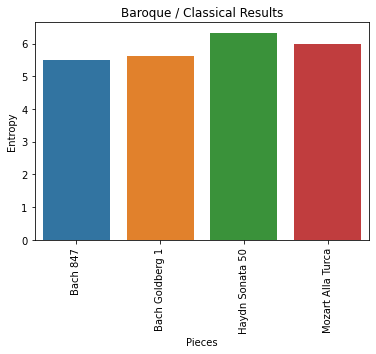

In [21]:
plot_bar_chart(barok_results, 'Baroque / Classical Results', 'Pieces')

### Romantic Entropy

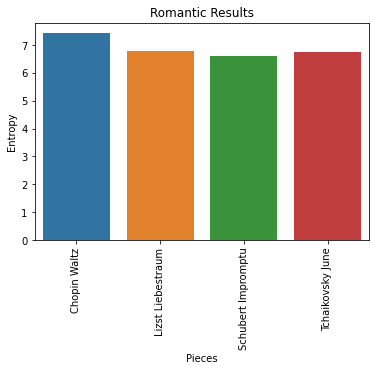

In [22]:
plot_bar_chart(romantik_results, 'Romantic Results', 'Pieces')

### Early Modern

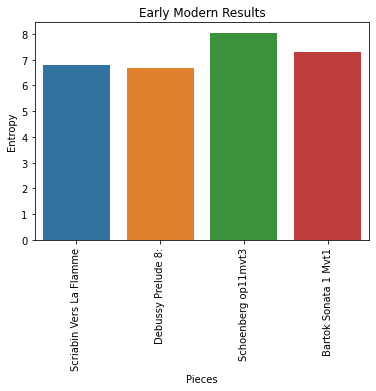

In [23]:
plot_bar_chart(earlymodern_results, 'Early Modern Results', 'Pieces')

### Contemporary Results

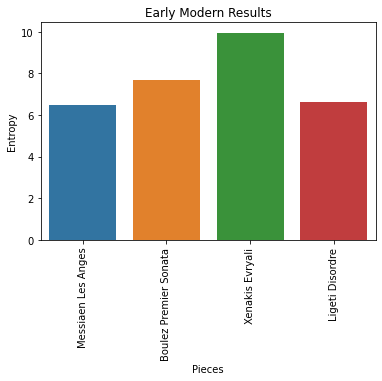

In [24]:
plot_bar_chart(contemporary_results, 'Early Modern Results', 'Pieces')

### All at once

In [51]:
list_of_results =  [contemporary_results, earlymodern_results, romantik_results, barok_results ]
dataframe_of_results = create_dataframe(list_of_results)

In [52]:
dataframe_of_results

,Entropy,Piece,Period
0,6.466679,Messiaen Les Anges,0
1,7.684505,Boulez Premier Sonata,0
2,9.954933,Xenakis Evryali,0
3,6.627844,Ligeti Disordre,0
4,6.808891,Scriabin Vers La Flamme,1
5,6.664076,Debussy Prelude 8:,1
6,8.058324,Schoenberg op11mvt3,1
7,7.298192,Bartok Sonata 1 Mvt1,1
8,7.432078,Chopin Waltz,2
9,6.780336,Lizst Liebestraum,2


In [54]:
dataframe_of_results['Period'] = dataframe_of_results['Period'].replace([0,1,2,3], 
                                                                ['Contemporary', 'Early Modern', 'Romantic', 'Baroque'])

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:441: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  artist_dict = ax.boxplot(box_data,
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:441: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  artist_dict = ax.boxplot(box_data,
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:441: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  artist_dict = ax.boxplot(box_data,
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:441: MatplotlibDeprecationWarning: Setting whis to 'range' is deprec

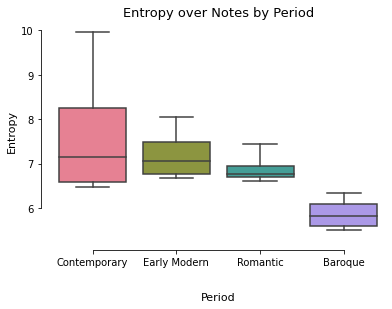

In [81]:
plot_by_period(dataframe_of_results)